In [1]:
# import sensingbee as sb
import sys
sys.path.append('/home/adelsondias/Repos/sensingbee/sensingbee')
import source as sb

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

configuration__ = {
    'DATA_FOLDER':'/home/adelsondias/Repos/newcastle/air-quality/data_1week1/',
    'SHAPE_PATH':'/home/adelsondias/Repos/newcastle/air-quality/shape/Middle_Layer_Super_Output_Areas_December_2011_Full_Extent_Boundaries_in_England_and_Wales/Middle_Layer_Super_Output_Areas_December_2011_Full_Extent_Boundaries_in_England_and_Wales.shp',
    'Sensors__frequency':'D',
    'Sensors__variables': ['NO2','Temperature','PM2.5'],
    'Sensors__threshold_callibration': {'Temperature':25, 'NO2':80, 'PM2.5':15},
    'Geography__filter_column':'msoa11nm',
    'Geography__filter_label':'Newcastle upon Tyne',
    'Geography__meshgrid':{'dimensions':[50,50], 'longitude_range':[-1.8, -1.51], 'latitude_range':[54.96, 55.05]},
    'osm_bbox': '(54.96,-1.8,55.05,-1.51)',
    'osm_line_objs': ['primary','trunk','motorway','residential'],
    'osm_point_objs': ['traffic_signals','crossing']
}

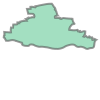

In [2]:
geography = sb.Geography(configuration__, mode='load')
geography.city.loc[0,'geometry']

In [3]:
sensors = sb.Sensors(configuration__, mode='load', path=configuration__['DATA_FOLDER'], delimit_geography=geography, delimit_quantiles=True)
sensors.data.head()

Value
Variable Sensor Name    Timestamp            
NO2      aq_mesh1756150 2018-07-31  66.174120
                        2018-08-01  46.456963
                        2018-08-02  38.587564
                        2018-08-03  48.094346
                        2018-08-04  33.266788

In [59]:
bsensors = sb.Sensors(configuration__, mode='make', path=configuration__['DATA_FOLDER'], 
                      delimit_geography=geography, delimit_quantiles=False, delimit_data_by_threshold=False)
print('Quantity of sensors')
print(bsensors.sensors.shape)

Quantity of sensors
(141, 5)


In [58]:
bsensors = sb.Sensors(configuration__, mode='make', path=configuration__['DATA_FOLDER'], 
                      delimit_geography=geography, delimit_quantiles=True, delimit_data_by_threshold=False)
print('Quantity of sensors with valid urbanicity (threshold: {\'NO2\':80, \'Temperature\':25, \'PM2.5\':15})')
print(bsensors.sensors.shape)

Quantity of sensors with valid urbanicity (threshold: {'NO2':80, 'Temperature':25, 'PM2.5':15})
(140, 5)


In [55]:
bsensors = sb.Sensors(configuration__, mode='make', path=configuration__['DATA_FOLDER'], 
                      delimit_geography=geography, delimit_quantiles=False, delimit_data_by_threshold=False)
print('With uncalibrated sensors')
print('NO2:',bsensors.data.loc['NO2'].shape)
print('Temperature:',bsensors.data.loc['Temperature'].shape)
print('PM2.5:',bsensors.data.loc['PM2.5'].shape)

With uncalibrated sensors
(577, 1)
(816, 1)
(206, 1)


In [54]:
bsensors = sb.Sensors(configuration__, mode='make', path=configuration__['DATA_FOLDER'], 
                      delimit_geography=geography, delimit_quantiles=False, delimit_data_by_threshold=True)
print('Without uncalibrated sensors')
print('NO2:',bsensors.data.loc['NO2'].shape)
print('Temperature:',bsensors.data.loc['Temperature'].shape)
print('PM2.5:',bsensors.data.loc['PM2.5'].shape)

(556, 1)
(816, 1)
(199, 1)


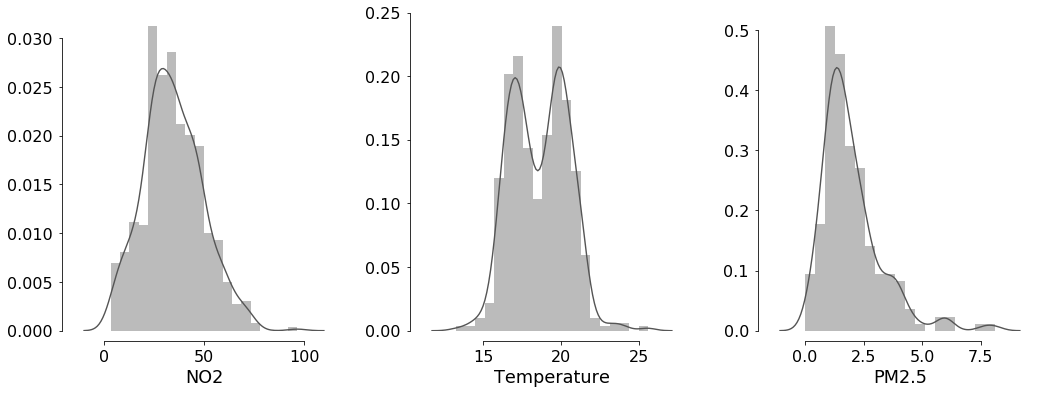

In [45]:
a = sensors.data.loc['NO2']
b = sensors.data.loc['Temperature']
c = sensors.data.loc['PM2.5']


fig, ax = plt.subplots(nrows=1,ncols=3, figsize=(15,6))
sns.distplot(a, ax=ax[0], color='#555555')
ax[0].set_xlabel('NO2')
sns.distplot(b, ax=ax[1], color='#555555')
ax[1].set_xlabel('Temperature')
sns.distplot(c, ax=ax[2], color='#555555')
ax[2].set_xlabel('PM2.5')

sns.despine(offset=10, trim=True);
sns.set_context("paper", font_scale=2.5)
plt.tight_layout()
plt.savefig('plots/histogram_variables.png')